<img src="../images/logo.png" alt="slb" style= "width: 1700px"/>

# ⚡️   - Tutorial 2: Supervised Learning

💡 The objective of this exercise is to learn how to apply supervised learning to predict an output variable from multi-dimensional data

<br>
📋 In this particular example we will try to predict 'pressure' using three well logs: AI, VpVs and phid

* AI: acoustic impedance = density x velocity

* VpVs: compressional velocity / shear velocity 

* phid: density porosity

<br>
📣 If we are able to develop such a model for a single well, then we could apply the model to a 3D dataset (AI, VpVs, phid) calculated from seismic data

In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

<font color="Red" size=5><b>🏁 Step 1- Quick Look at the Data</font></b>

In [2]:
# Load and display the well logs dataset ('w5.csv')

log_data= pd.read_csv("../Data/w5.csv")


# Assign 'DEPTH' as the index

log_data = log_data.set_index('DEPTH')

log_data

,Pressure,AI,VpVs,SW,phid,vcl
DEPTH,,,,,,
2925.7752,110.290817,5440.637207,2.405974,0.892151,0.203704,0.234009
2926.0800,110.278862,5421.380859,2.412638,0.828552,0.216667,0.238281
2926.3848,110.266571,5379.141113,2.379807,0.816040,0.222222,0.237244
2926.6896,110.253937,5318.934082,2.376570,0.814148,0.233951,0.236816
2926.9944,110.240982,5237.886719,2.348559,0.839233,0.242593,0.235290
...,...,...,...,...,...,...
5079.4920,195.332459,6649.839844,2.722054,1.000000,0.196913,0.563782
5079.7968,195.317154,6661.812500,2.739437,1.000000,0.191975,0.563782
5080.1016,195.301407,6703.090820,2.782149,1.000000,0.181481,0.563782


In [3]:
# Display a summary of the dataset using the .info() function

log_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7071 entries, 2925.7752 to 5080.7112
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pressure  7071 non-null   float64
 1   AI        7071 non-null   float64
 2   VpVs      7071 non-null   float64
 3   SW        7071 non-null   float64
 4   phid      7071 non-null   float64
 5   vcl       7071 non-null   float64
dtypes: float64(6)
memory usage: 386.7 KB


In [4]:
# Compute summary statistics of the variables in the dataset

log_data.describe().T

# 💊 Remember that .T is used to transpose rows and variables

,count,mean,std,min,25%,50%,75%,max
Pressure,7071.0,159.818896,31.969994,109.568970,125.527435,177.223236,182.697830,200.164215
AI,7071.0,6433.067649,850.125050,4329.592285,5734.095703,6356.963867,7070.601807,9090.337891
VpVs,7071.0,2.244933,0.209920,1.425506,2.096754,2.210398,2.380453,3.011523
SW,7071.0,0.959885,0.125814,0.122253,1.000000,1.000000,1.000000,1.000000
phid,7071.0,0.189418,0.043048,0.088889,0.155556,0.186420,0.221605,0.346296
vcl,7071.0,0.333354,0.112258,0.007080,0.267212,0.338806,0.407623,0.744873


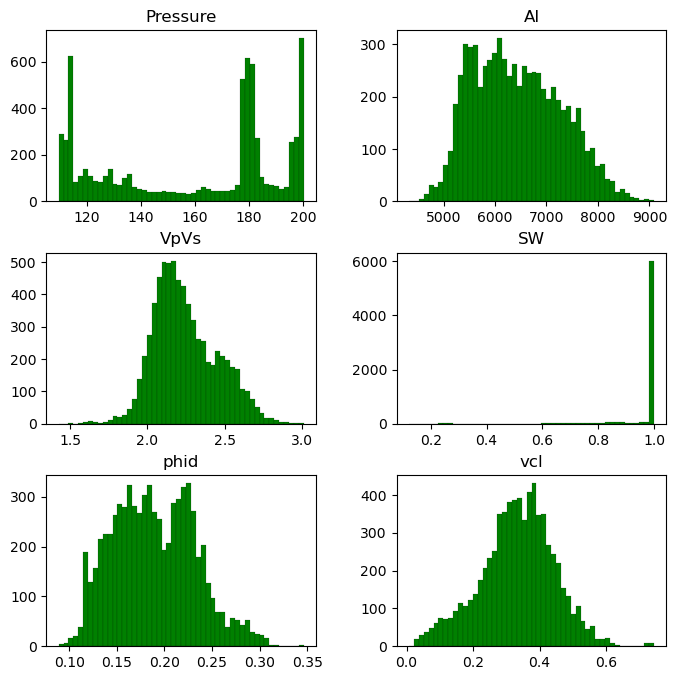

In [5]:
# Compute and draw histograms for all variables in the dataset

log_data.hist(bins=50, figsize=(8,8), grid=False, color='green', edgecolor = "black", lw=0.1)

plt.show()

In [6]:
# Generate a correlation matrix for all variables in the dataset

log_data.corr()

,Pressure,AI,VpVs,SW,phid,vcl
Pressure,1.000000,0.776142,-0.653179,-0.184758,-0.605674,-0.243069
AI,0.776142,1.000000,-0.565515,0.053564,-0.847191,-0.156456
VpVs,-0.653179,-0.565515,1.000000,0.351425,0.465605,0.328674
SW,-0.184758,0.053564,0.351425,1.000000,-0.204653,0.507663
phid,-0.605674,-0.847191,0.465605,-0.204653,1.000000,-0.124635
vcl,-0.243069,-0.156456,0.328674,0.507663,-0.124635,1.000000


❓ What does the numbers within the table mean?

<details>
<summary> 💡 Hint </summary>
    
It is the method of correlation. By default, the fucntion .corr() uses the **Pearson correlation coefficient**. It is is a measure of linear correlation between two sets of data

</details>

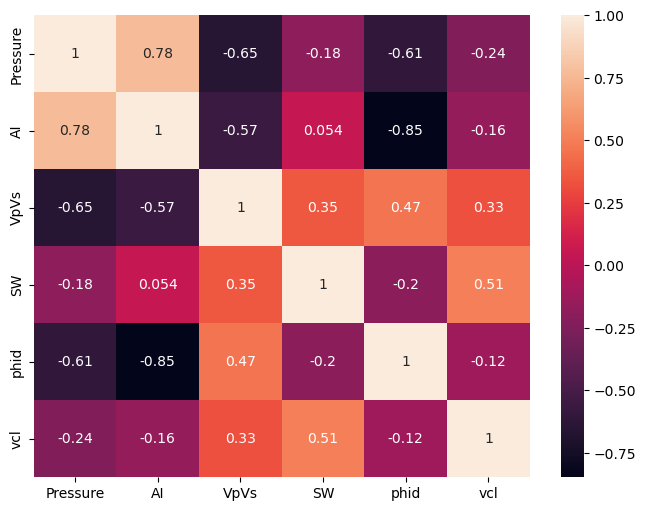

In [7]:
# Plot a heat map using the previously generated pearson values from the correlation matrix 

fig, ax = plt.subplots(figsize=(8, 6)) # To adjust the figure size

sns.heatmap(log_data.corr(), annot=True)

plt.show()

In [8]:
# List the correlation coefficients between 'pressure' and the rest of the variables in the dataset

log_data.corr()["Pressure"].sort_values(ascending=False)

Pressure    1.000000
AI          0.776142
SW         -0.184758
vcl        -0.243069
phid       -0.605674
VpVs       -0.653179
Name: Pressure, dtype: float64

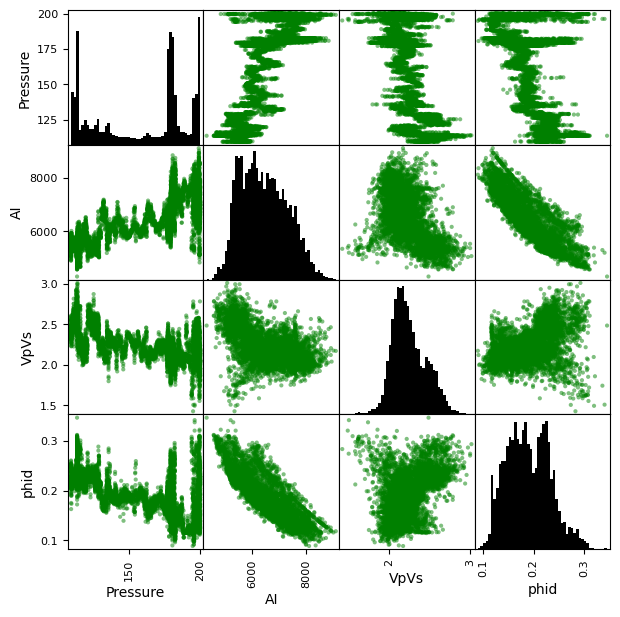

In [9]:
# Now let's visualize a scatter matrix plot between some of the logs in the dataset: 'Pressure', 'AI', 'VpVs', 'phid'

variables_to_plot = ["Pressure", "AI", "VpVs", "phid"]

scatter_matrix(log_data[variables_to_plot], figsize=(7, 7), diagonal = 'hist', 
               hist_kwds={'bins':50, 'color':'black'},
               marker='.', color='green');
plt.show()

<font color="Red" size=5><b>🏁 Step 2- Create the 'Features' and 'Target' Dataframes</font></b>

💡 Since the idea is to eventually use the model for the entire field, we need to make sure that we choose the inputs to our models wisely 🧠

For example, if we use the logs 'AI', 'VpVs', 'phid' as the input for our model, it is very likely that we will have the same inputs from a 3D dataset (seismic cube).

In [10]:
# Create a new dataframe named 'features' that only contains the following logs: 'AI','VpVs', and 'phid'

features= log_data[["AI","VpVs","phid"]]

features

,AI,VpVs,phid
DEPTH,,,
2925.7752,5440.637207,2.405974,0.203704
2926.0800,5421.380859,2.412638,0.216667
2926.3848,5379.141113,2.379807,0.222222
2926.6896,5318.934082,2.376570,0.233951
2926.9944,5237.886719,2.348559,0.242593
...,...,...,...
5079.4920,6649.839844,2.722054,0.196913
5079.7968,6661.812500,2.739437,0.191975
5080.1016,6703.090820,2.782149,0.181481


In [11]:
# Create a new dataframe that only contains the variable 'pressure' (our target variable), call it 'target'

target= log_data["Pressure"]

target

DEPTH
2925.7752    110.290817
2926.0800    110.278862
2926.3848    110.266571
2926.6896    110.253937
2926.9944    110.240982
                ...    
5079.4920    195.332459
5079.7968    195.317154
5080.1016    195.301407
5080.4064    195.285156
5080.7112    195.268417
Name: Pressure, Length: 7071, dtype: float64

<font color="Red" size=5><b>🏁 Step 3- Create Splits for Test and Train Sets</font></b>

💡 Now, to ensure that the model works on unseen data, we need to split the data into **test set** and **train set** 👇

In [12]:
from sklearn.model_selection import train_test_split 

# Split the 'features' and 'target' dataframes into random train and test subsets [80:20 ratio]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state= 1)


# ✍️ 'X' refers to the features, and 'y' refer to the target

# ✍️ 'test_size= 0.2' represents the proportion of data points that will be in the test set (20%)

In [13]:
# Let's explore the shape of the 'X_train' and 'y_test' dataframes

print ('features_train', X_train.shape)

print ('features_test', X_test.shape)

features_train (5656, 3)
features_test (1415, 3)


<font color="Red" size=5><b>🏁 Step 4 - Training and Testing a Random Forest Model</font></b>

In [14]:
# Define the random forest model

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()


# Fit the model to the train dataset

rf.fit(X_train, y_train.values)


# Now, we can predict the 'target' using the trained model

pred_rf = rf.predict(X_test)


In [15]:
# Check the accuracy of the prediction using MSE and RMSE metrics

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred_rf)
rmse = np.sqrt(mse)

print ("MSE: ", mse)

print ("RMSE: ", rmse)

MSE:  172.67644941536565
RMSE:  13.140641134106268


📝 **MSE**: mean squared error measures the average squared difference between the estimated values and the actual value

📝  **RMSE**: root-mean-square error represents the square root of the differences between predicted values and observed values or the quadratic mean of these differences

In [16]:
# Compute the r2 score (coefficient of determination) to evaluate the performance of the random forest model

from sklearn.metrics import r2_score

r2_score(y_test, pred_rf)

0.8286349662043797

📝 **r2 score**: Coefficient of determination. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

<font color="Red" size=5><b>🏁 Step 5- Visualizing a Prediction Error Plot</font></b>

🤔 Just by looking at the MSE, RMSE and r2 values, we might be misled about the model performance

🚀 Remember that each metric indicates the performance in terms of different aspects of the model

💡 We can use the `prediction_error` plot from the yellowbrick library to visualize the actual model prediction 👇

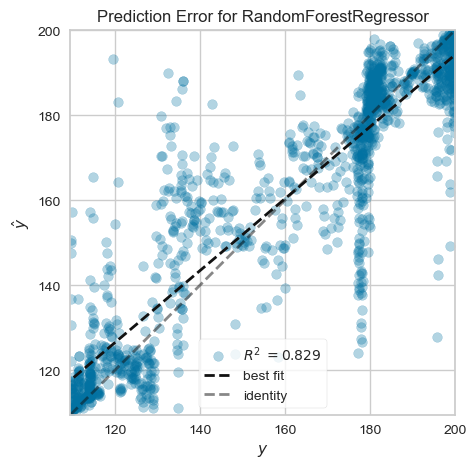

In [17]:
# Create a prediction error plot for the random forest model

from yellowbrick.regressor import prediction_error

visualizer= prediction_error(RandomForestRegressor(),
                            X_train.values,
                             y_train.values,
                             X_test.values,
                             y_test.values,
                            alpha=0.3, size=(500, 500))

# y = Actual Target Value -> Actual Pressure

# ŷ = Predicted Target value -> Predicted Pressure

<font color="Red" size=5><b>🏁 Step 6- Training and Testing a Support Vector Regression Model</font></b>

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR

# First, let's standardize the data -> Define the scaler 
sc= StandardScaler()

# Fit the scaler to the training set
sc.fit(X_train)

# Define the SVR model 
svm = SVR()

# Fit the model on the train dataset. 
# 🤚 Don't forget to call sc.transform () to perform the standardization

svm.fit(sc.transform(X_train), y_train.values)

# Now, we can predict the 'target' using the trained model on the test set
pred_svm = svm.predict(sc.transform(X_test))

In [19]:
# Compute the r2 score (coefficient of determination) to evaluate the performance of the SVR model

r2_score(y_test, pred_svm)

0.7793838282247751

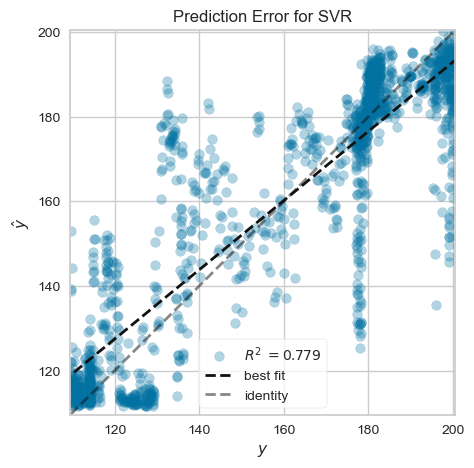

In [20]:
# Create a prediction error plot for the Support Vector Regression (SVR) Model

visualizer= prediction_error(SVR(),sc.transform(X_train),  y_train.values,
                            sc.transform(X_test), y_test.values,
                           alpha=0.3, size=(500, 500))

<font color="Red" size=5><b>🏁 Step 7- Hyperparameter Tuning Using Grid Search</font></b>

In [21]:
# Define a dictionary with the hyperparameters of the random forest model that we would like to test

# Let's try 6 combinations (3×2) of hyperparameters

param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 3]}]


# ✍️ n_estimators: number of trees in the forest  

# ✍️ max_features: maximum number of features to consider when looking for the best split

💥 Let's take a minute to understand what the grid search will automatically do 👇

In [23]:
# run1  n_estimators=3      max_features=2

model= RandomForestRegressor(n_estimators=3,max_features=2)
model.fit(X_train,y_train.values)
preds= model.predict(X_test)
print('r2 run1',r2_score(y_test,preds))

# run2  n_estimators=3      max_features=3

model= RandomForestRegressor(n_estimators=3,max_features=3)
model.fit(X_train,y_train.values)
preds= model.predict(X_test)
print('r2 run2', r2_score(y_test,preds))

# run3  n_estimators=10      max_features=2

# ...

# ...

# run6  n_estimators=30      max_features=3

r2 run1 0.7945769266300695
r2 run2 0.7715255646863961


🙌 Now that we understand what GridSearch does, we can implement it!

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the random forest regressor model
forest_reg = RandomForestRegressor()

# Now let’s create an object of GridSearchCV
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='r2',return_train_score=True)

# Fit the training data into the GridSearchCV object
grid_search.fit(X_train, y_train.values)

# We can now extract the best parameters after tuning
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=2, n_estimators=30)


In [25]:
# Now we can predict the 'target' using the optimal model on the test set

opt_pred = grid_search.predict(X_test)

# Extract the score of the best estimator model on the testing data

print ('r2 best RF model GS ->',r2_score(y_test, opt_pred))

r2 best RF model GS -> 0.8345754943294426


In [26]:
# Create and display a dataframe with the results from the hyperparameter tuning (GridSearch)

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053875,0.014704,0.006383,0.000798,2,3,"{'max_features': 2, 'n_estimators': 3}",0.766813,0.813429,0.742330,...,0.778841,0.025906,5,0.951031,0.945852,0.943344,0.947012,0.947694,0.946986,0.002506
1,0.158307,0.023526,0.011177,0.001706,2,10,"{'max_features': 2, 'n_estimators': 10}",0.816183,0.836532,0.805046,...,0.819566,0.011565,3,0.968851,0.966838,0.969298,0.966440,0.968816,0.968049,0.001170
2,0.434126,0.031591,0.024946,0.010511,2,30,"{'max_features': 2, 'n_estimators': 30}",0.822136,0.849384,0.811293,...,0.828735,0.014188,1,0.974235,0.974508,0.974593,0.973739,0.974341,0.974283,0.000299
3,0.056578,0.002067,0.005185,0.000399,3,3,"{'max_features': 3, 'n_estimators': 3}",0.753743,0.798607,0.758097,...,0.769831,0.019112,6,0.949005,0.944945,0.946572,0.942217,0.947000,0.945948,0.002270
4,0.189074,0.015867,0.009968,0.001554,3,10,"{'max_features': 3, 'n_estimators': 10}",0.813034,0.834472,0.778335,...,0.808548,0.021847,4,0.968293,0.967627,0.970342,0.967419,0.968186,0.968373,0.001038
5,0.570008,0.078773,0.022144,0.004696,3,30,"{'max_features': 3, 'n_estimators': 30}",0.827083,0.844083,0.802882,...,0.825120,0.015752,2,0.973700,0.973290,0.974985,0.973972,0.974507,0.974091,0.000597


💡 Note that the dataframe have 6 rows: 3 choices for 'n_estimators' times 2 choices for 'max_features'

<font color="Red" size=5><b>🏁 Step 8- Hyperparameter Tuning Using Randomized Search</font></b>

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Generate a dictionary with the hyperparameters of the random forest model that we would like to test
param_distribs = {'n_estimators': randint(1,200),
                    'max_features': randint(1, 3)}


# Define the random forest regressor model
forest_reg = RandomForestRegressor(random_state=42)

# 💊 Note that random_state sets a seed (42) to ensure that the splits are reproducible


# Create an object of RandomizedSearchCV
rnd_search = RandomizedSearchCV(forest_reg, param_distributions= param_distribs,
                                n_iter= 10, cv= 5, scoring= 'r2', random_state= 42)

# Fit the data into the RandomizedSearchCV object
rnd_search.fit(X_train, y_train.values)

# Extract the best parameters after tuning
print(rnd_search.best_estimator_)


RandomForestRegressor(max_features=2, n_estimators=152, random_state=42)


In [28]:
# Now we can predict the 'target' using the optimal model based on the the randomized search
opt_pred_rnd = rnd_search.predict(X_test)


# Extract the score of the best estimator model on the testing data
print ('r2 best RF model RS ->', r2_score(y_test, opt_pred_rnd))


r2 best RF model RS -> 0.8337676889214282


❓ How do the r2 scores from the **GridSearch** and **RandomizedSearch** compare?

In [29]:
# Create and display a dataframe with the results from the hyperparameter tuning (randomized search)

pd.DataFrame(rnd_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.801762,0.093675,0.092681,0.015132,1,180,"{'max_features': 1, 'n_estimators': 180}",0.825468,0.851736,0.810251,0.842596,0.819723,0.829955,0.015148,3
1,0.140654,0.009513,0.010166,0.000403,1,15,"{'max_features': 1, 'n_estimators': 15}",0.812515,0.840848,0.801742,0.840144,0.803934,0.819837,0.017250,10
2,0.678347,0.022288,0.037673,0.003129,1,72,"{'max_features': 1, 'n_estimators': 72}",0.825234,0.851313,0.810855,0.843872,0.817382,0.829731,0.015458,7
3,0.186072,0.006162,0.012160,0.000740,1,21,"{'max_features': 1, 'n_estimators': 21}",0.819045,0.844931,0.806842,0.840352,0.808852,0.824004,0.015836,9
4,1.061073,0.019580,0.060438,0.003758,1,122,"{'max_features': 1, 'n_estimators': 122}",0.823846,0.852788,0.809959,0.842678,0.818929,0.829640,0.015757,8
5,0.628424,0.042749,0.037170,0.005043,1,75,"{'max_features': 1, 'n_estimators': 75}",0.825644,0.851611,0.810808,0.843282,0.817598,0.829789,0.015390,6
6,0.737249,0.059423,0.041393,0.005155,1,88,"{'max_features': 1, 'n_estimators': 88}",0.824256,0.851997,0.810995,0.843292,0.818960,0.829900,0.015340,4
7,0.740025,0.009461,0.040565,0.001558,1,100,"{'max_features': 1, 'n_estimators': 100}",0.823900,0.852761,0.810971,0.842826,0.819025,0.829896,0.015507,5
8,1.631663,0.032378,0.064372,0.002452,2,152,"{'max_features': 2, 'n_estimators': 152}",0.829891,0.851669,0.807252,0.842731,0.820686,0.830446,0.015715,1
9,1.174819,0.019828,0.064627,0.004100,1,150,"{'max_features': 1, 'n_estimators': 150}",0.825220,0.852024,0.810575,0.842691,0.819957,0.830093,0.015147,2


<font color="Red" size=5><b>🏁 Step 9 - Set Up a Machine Learning Pipeline</font></b>

💡 ML pipelines are used to automate the ML workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs 👇

In [30]:
# Import the required libraries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

✍️ We will include the following steps in our ML pipeline: 

* Impute missing values (NaN)
* Standardize the dataset
* Define the ML model

In [31]:
# Define the desired steps in the pipeline: deal with NaN, standardize, ML model

"""
This pipeline performs data preprocessing and trains an SVR model.
'imputer' -> To replace the NaN values by the median of each column
'scaler' -> To scale the dataset so that min= 0, max =1
'model' -> To define the ML model
"""

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler()),
    ('model',SVR())
])

💡 Note that the pipeline can be used as any other estimator so let's use it to predict the 'target'

In [32]:
# First, fit the pipeline to the dataset
pipe.fit(X_train, y_train.values)


# Now, we can predict the 'target' using the trained model in the pipe
pred_pipe_svr = pipe.predict(X_test)


# Compute the r2 score to evaluate the performance of the model
r2_score(y_test, pred_pipe_svr)


0.7831903242997355

<font color="Red" size=5><b>🏁 Step 10 - Set Up a ML Pipeline with Grid Search </font></b>

In [33]:
# Let's start by checking the list of available parameters for tuning

pipe.get_params().keys()

pipe.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('scaler', MinMaxScaler()),
  ('model', SVR())],
 'verbose': False,
 'imputer': SimpleImputer(strategy='median'),
 'scaler': MinMaxScaler(),
 'model': SVR(),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__missing_values': nan,
 'imputer__strategy': 'median',
 'imputer__verbose': 'deprecated',
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__cache_size': 200,
 'model__coef0': 0.0,
 'model__degree': 3,
 'model__epsilon': 0.1,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [34]:
# Define a dictionary with the parameters from the SVR model that we would like to test

param_grid = [
    {'model__C': [1, 3, 10], 
     'model__epsilon': [0.1, 0.5, 0.8, 1],
     'scaler':[StandardScaler(),MinMaxScaler()]},
]

💡 In SVR, **C** is a regularization parameter and **epsilon** defines a margin of tolerance (error sensitivity)

Regularization is a technique used in machine learning to control the complexity of a model and prevent overfitting

In [35]:
# Now let’s create an object of GridSearchCV

grid_search_pipe = GridSearchCV(pipe, param_grid, cv=5,
                                scoring='r2',return_train_score=True)


# Fit the data into the GridSearchCV object

grid_search_pipe.fit(X_train, y_train.values)


# We can now extract the best parameters after tuning

print(grid_search_pipe.best_estimator_)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('model', SVR(C=10, epsilon=1))])


In [36]:
# Now, let's predict the 'target' using the best pipeline model

pred_ = grid_search_pipe.predict(X_test)


# Compute the r2 score to evaluate the performance of the pipeline model on the test set

r2_score(y_test, pred_)

0.8067512372493431

🎯 Well done!